In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import torch

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
df = pd.read_csv('taiwan.csv')

In [3]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# strip column leading and trailing white spaces
for column in df.columns:
    df = df.rename(columns = {column : column.strip()})

In [7]:
# look for null values
df.isnull().sum().value_counts()

0    96
dtype: int64

In [8]:
# drop all null 
df_cleaned = df.dropna(axis = 0, how = 'any', inplace = False)

In [9]:
corr_matrix = df_cleaned.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

# drop features 
df_cleaned.drop(df_cleaned[to_drop], axis=1)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.639806,0.314063,0.027951,0,0.000466,0.623620,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.642072,0.314446,0.031470,0,0.001959,0.623931,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.631678,0.313353,0.007542,0,0.002840,0.624156,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.684857,0.320118,0.022916,0,0.002837,0.623957,0.026822,0.565302,1,0.044009


In [10]:
# search for duplicate rows 
print(df_cleaned.duplicated().value_counts())

False    6819
dtype: int64


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

# Random Forest Model (THIS IS OUR BEST MODEL!!!)

In [11]:
X = df_cleaned.iloc[:, 1:] 
y = df_cleaned.iloc[:, 0]  

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# utilize smote to balance minority samples 
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier()

#set param grid for randomizedsearchcv
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False],  
    'class_weight': [None, 'balanced', 'balanced_subsample']  
}

#focus hypertuning on bankrupt company precision score
precision_scorer = make_scorer(precision_score, pos_label=1)

rf_random = RandomizedSearchCV(rf, param_grid, cv=5, scoring=precision_scorer, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

# Fitting Random Forest to the Training set
rf_random.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred = rf_random.predict(X_test)

# finds model with best precision scores 
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# print out results to examine if overfitting and bias occured
cv_results = pd.DataFrame(rf_random.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']].head(5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.61      0.36      0.45        78

    accuracy                           0.97      2046
   macro avg       0.79      0.67      0.72      2046
weighted avg       0.96      0.97      0.96      2046



,mean_test_score,std_test_score,mean_train_score,std_train_score
1,0.986187,0.002349,1.000000,0.000000
6,0.985981,0.004253,1.000000,0.000000
0,0.981376,0.005010,0.999297,0.000217
4,0.981340,0.003888,1.000000,0.000000
5,0.980526,0.004384,0.997251,0.000461


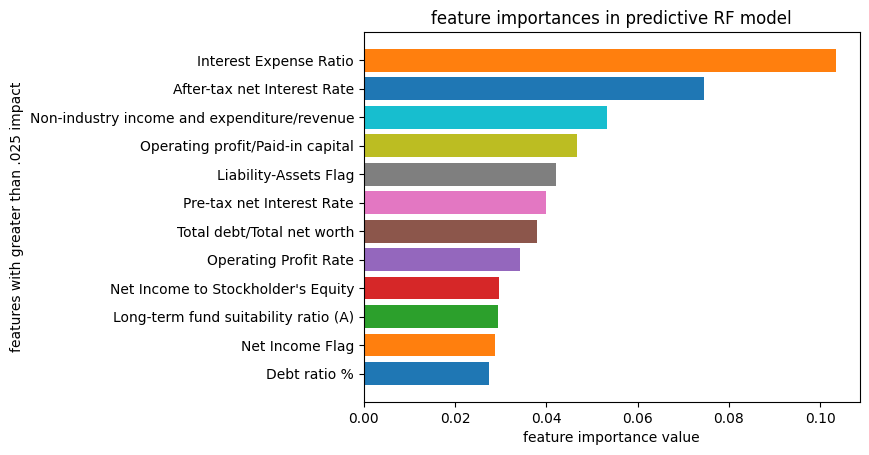

In [12]:
# zip and sort feature importances
rf_impt = list(zip(df_cleaned[1:], best_model.feature_importances_))
rf_impt.sort(key=lambda x: x[1], reverse=False)

# plot  horizontal bar graph 
plt.figure()
plt.xlabel('feature importance value')
plt.ylabel('features with greater than .025 impact')
plt.title('feature importances in predictive RF model')
for i in range(len(rf_impt)):
    # only print if feature is more than .025 importance 
    if rf_impt[i][1] > 0.025:
        plt.barh(rf_impt[i][0], rf_impt[i][1])
plt.show()

# SVM Model

In [13]:
# Assuming df_cleaned is your preprocessed dataframe
X = df_cleaned.iloc[:, 1:]
y = df_cleaned.iloc[:, 0]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],  
    'class_weight': [None, 'balanced']  
}

# Create a SVM Classifier
svm = SVC(class_weight='balanced')

precision_scorer = make_scorer(precision_score, pos_label=1)

# Random search of parameters
svm_random = RandomizedSearchCV(svm, param_grid, scoring=precision_scorer, cv=5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)


# Fit the random search model
svm_random.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred = svm_random.predict(X_test_scaled)

# finds model with best precision scores 
best_model = svm_random.best_estimator_
y_pred = best_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report);

# print out results to examine if overfitting and bias occured
cv_results = pd.DataFrame(svm_random.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']].head(5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.38      0.04      0.07        78

    accuracy                           0.96      2046
   macro avg       0.67      0.52      0.52      2046
weighted avg       0.94      0.96      0.95      2046



,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.964365,0.018537,0.976455,0.003755
4,0.961477,0.006998,0.978851,0.001156
5,0.956651,0.004846,1.000000,0.000000
9,0.956651,0.004846,1.000000,0.000000
1,0.926609,0.009964,0.936111,0.002692


# KNN Model

In [14]:
X = df_cleaned.iloc[:, 1:]
y = df_cleaned.iloc[:, 0]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(1, 30),         
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
}

# Create a KNN Classifier
knn = KNeighborsClassifier()

precision_scorer = make_scorer(precision_score, pos_label=1)

# Grid search of parameters
knn_random = RandomizedSearchCV(knn, param_grid, scoring = precision_scorer, cv=5, verbose=2, n_jobs=-1, return_train_score=True)

# Fit the grid search model
knn_random.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred = knn_random.predict(X_test_scaled)

# finds model with best precision scores 
best_model = knn_random.best_estimator_
y_pred = best_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report);


# print out results to examine if overfitting and bias occured
cv_results = pd.DataFrame(knn_random.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']].head(5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1968
           1       0.34      0.42      0.38        78

    accuracy                           0.95      2046
   macro avg       0.66      0.70      0.67      2046
weighted avg       0.95      0.95      0.95      2046



,mean_test_score,std_test_score,mean_train_score,std_train_score
8,0.962837,0.003014,1.000000,0.000000
5,0.956466,0.004225,1.000000,0.000000
7,0.938207,0.007866,1.000000,0.000000
1,0.899950,0.011039,0.910185,0.002246
4,0.897523,0.005950,1.000000,0.000000


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.8s
[CV] END bootstrap=True, class_weight=None, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   7.2s
[CV] END bootstrap=True, class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  10.3s
[CV] END bootstrap=True, class_weight=None, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   7.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END C=0.1, cla

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   7.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  18.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=poly; total time=   5.9s
[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   2.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=sigmoid; total time=   0.5s
[CV] END C=10, class_wei